In [7]:
url="https://github.com/rufinachettiar/git/blob/master/shootlog.pcap"

In [9]:
!curl -o /home/rufina/Documents/github-dropbox/rename/new/git/shootlog.pcap $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24915    0 24915    0     0   231k      0 --:--:-- --:--:-- --:--:--  233k


In [10]:
ls -l /home/rufina/Documents/github-dropbox/rename/new/git/shootlog.pcap

-rw-r--r-- 1 rufina rufina 24915 Mar 22 02:15 /home/rufina/Documents/github-dropbox/rename/new/git/shootlog.pcap


In [11]:
!md5sum /home/rufina/Documents/github-dropbox/rename/new/git/shootlog.pcap

d5f759ad93da75a504c4d120398a5fa6  /home/rufina/Documents/github-dropbox/rename/new/git/shootlog.pcap


In [12]:
!tshark -v

TShark 1.10.6 (v1.10.6 from master-1.10)

Copyright 1998-2014 Gerald Combs <gerald@wireshark.org> and contributors.
This is free software; see the source for copying conditions. There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Compiled (64-bit) with GLib 2.39.91, with libpcap, with libz 1.2.8, with POSIX
capabilities (Linux), without libnl, with SMI 0.4.8, with c-ares 1.10.0, with
Lua 5.2, without Python, with GnuTLS 2.12.23, with Gcrypt 1.5.3, with MIT
Kerberos, with GeoIP.

Running on Linux 3.13.0-46-generic, with locale en_US.UTF-8, with libpcap
version 1.5.3, with libz 1.2.8.
Intel(R) Xeon(R) CPU E5-1607 v3 @ 3.10GHz

Built using gcc 4.8.2.


In [13]:
!tshark -n -r /home/rufina/Documents/github-dropbox/rename/new/git/shoot.log -T fields -Eheader=y -e frame.number -e frame.len > frame.len

In [14]:
!head -10 frame.len

frame.number	frame.len
1	74
2	74
3	66
4	385
5	66
6	623
7	66
8	1514
9	66


In [15]:
import pandas as pd

In [16]:
df=pd.read_table("frame.len")

In [17]:
df

,frame.number,frame.len
0,1,74
1,2,74
2,3,66
3,4,385
4,5,66
5,6,623
6,7,66
7,8,1514
8,9,66
9,10,490


In [18]:
df["frame.len"].describe()

count     129.000000
mean      164.124031
std       248.922397
min        66.000000
25%        66.000000
50%        66.000000
75%        74.000000
max      1514.000000
Name: frame.len, dtype: float64

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
figsize(10,6)

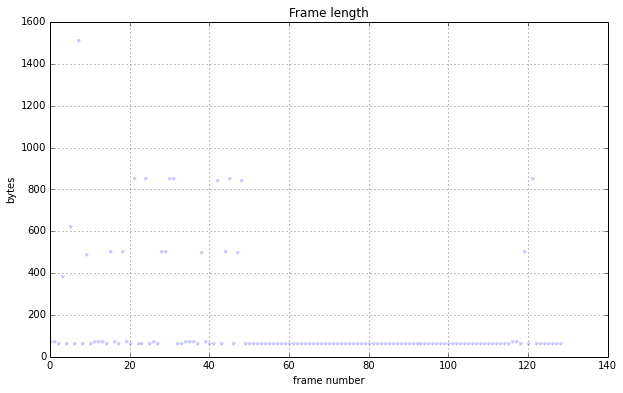

In [21]:
df["frame.len"].plot(style=".", alpha=0.2)
title("Frame length")
ylabel("bytes")
xlabel("frame number")

In [22]:
import subprocess
import datetime
import pandas as pd

def read_pcap(filename, fields=[], display_filter="", 
              timeseries=False, strict=False):
    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filter)
    filterspec = "-R '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=datetime.datetime.fromtimestamp)
    else:
        df = pd.read_table(proc.stdout)
    return df

In [29]:
framelen=read_pcap("/home/rufina/Documents/github-dropbox/rename/new/git/shoot.log", ["frame.len"], timeseries=True)
framelen

,frame.len
frame.time_epoch,
2015-03-22 01:57:15.612750,74
2015-03-22 01:57:15.686926,74
2015-03-22 01:57:15.686991,66
2015-03-22 01:57:15.695736,385
2015-03-22 01:57:15.769928,66
2015-03-22 01:57:15.776000,623
2015-03-22 01:57:15.776036,66
2015-03-22 01:57:15.776116,1514
2015-03-22 01:57:15.776129,66


In [30]:
bytes_per_second=framelen.resample("S", how="sum")

In [31]:
bytes_per_second.head()

,frame.len
frame.time_epoch,
2015-03-22 01:57:15,3490
2015-03-22 01:57:16,NaN
2015-03-22 01:57:17,NaN
2015-03-22 01:57:18,NaN
2015-03-22 01:57:19,8384


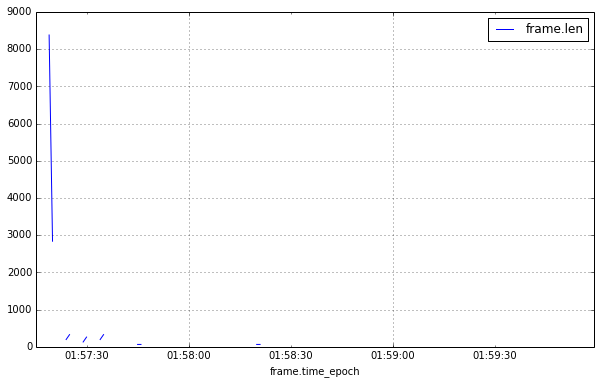

In [32]:
bytes_per_second.plot()

In [33]:
fields=["tcp.stream", "ip.src", "ip.dst", "tcp.seq", "tcp.ack", "tcp.window_size", "tcp.len"]
ts=read_pcap("/home/rufina/Documents/github-dropbox/rename/new/git/shoot.log", fields, timeseries=True, strict=True)
ts

,tcp.stream,ip.src,ip.dst,tcp.seq,tcp.ack,tcp.window_size,tcp.len
frame.time_epoch,,,,,,,
2015-03-22 01:57:15.686926,0,91.189.90.41,128.119.247.197,0,1,5792,0
2015-03-22 01:57:15.686991,0,128.119.247.197,91.189.90.41,1,1,29312,0
2015-03-22 01:57:15.695736,0,128.119.247.197,91.189.90.41,1,1,29312,319
2015-03-22 01:57:15.769928,0,91.189.90.41,128.119.247.197,1,320,6912,0
2015-03-22 01:57:15.776000,0,91.189.90.41,128.119.247.197,1,320,6912,557
2015-03-22 01:57:15.776036,0,128.119.247.197,91.189.90.41,320,558,30336,0
2015-03-22 01:57:15.776116,0,91.189.90.41,128.119.247.197,558,320,6912,1448
2015-03-22 01:57:15.776129,0,128.119.247.197,91.189.90.41,320,2006,33280,0
2015-03-22 01:57:15.776176,0,91.189.90.41,128.119.247.197,2006,320,6912,424


In [34]:
stream=ts[ts["tcp.stream"] == 10]

In [35]:
stream

"<class 'pandas.tseries.index.DatetimeIndex'> Length: 0, Freq: None, Timezone: None",Empty DataFrame


In [36]:
per_stream=ts.groupby("tcp.stream")
per_stream.head()

tcp.stream           ip.src  \
tcp.stream frame.time_epoch                                          
0          2015-03-22 01:57:15.686926           0     91.189.90.41   
           2015-03-22 01:57:15.686991           0  128.119.247.197   
           2015-03-22 01:57:15.695736           0  128.119.247.197   
           2015-03-22 01:57:15.769928           0     91.189.90.41   
           2015-03-22 01:57:15.776000           0     91.189.90.41   
1          2015-03-22 01:57:19.174729           1      72.21.91.29   
           2015-03-22 01:57:19.174771           1  128.119.247.197   
           2015-03-22 01:57:19.174913           1  128.119.247.197   
2          2015-03-22 01:57:19.175741           2      72.21.91.29   
           2015-03-22 01:57:19.175778           2  128.119.247.197   
           2015-03-22 01:57:19.175890           2  128.119.247.197   
1          2015-03-22 01:57:19.182698           1      72.21.91.29   
           2015-03-22 01:57:19.183224           1      72.21.91.29   
2          2015-03-22 01:57:19.183473           2      72.21.91.29   
           2015-03-22 01:57:19.184041           2      72.21.91.29   
3          2015-03-22 01:57:19.184117           3      72.21.91.29   
           2015-03-22 01:57:19.184142           3  128.119.247.197   
4          2015-03-22 01:57:19.961868           4   216.58.219.206   
           2015-03-22 01:57:19.961896           4  128.119.247.197   
           2015-03-22 01:57:19.961997           4  128.119.247.197   
5          2015-03-22 01:57:19.968281           5   216.58.219.206   
           2015-03-22 01:57:19.968323           5  128.119.247.197   
4          2015-03-22 01:57:19.969457           4   216.58.219.206   
           2015-03-22 01:57:19.990941           4   216.58.219.206   
3          2015-03-22 01:57:24.194701           3  128.119.247.197   
           2015-03-22 01:57:24.202402           3      72.21.91.29   
           2015-03-22 01:57:24.202437           3  128.119.247.197   
5          2015-03-22 01:57:25.194649           5  128.119.247.197   
           2015-03-22 01:57:25.202102           5   216.58.219.206   
           2015-03-22 01:57:25.202141           5  128.119.247.197   
6          2015-03-22 01:59:44.362548           6      72.21.91.29   
           2015-03-22 01:59:44.362592           6  128.119.247.197   
           2015-03-22 01:59:44.362792           6  128.119.247.197   
           2015-03-22 01:59:44.370472           6      72.21.91.29   
           2015-03-22 01:59:44.371037           6      72.21.91.29   

                                                ip.dst  tcp.seq  tcp.ack  \
tcp.stream frame.time_epoch                                                
0          2015-03-22 01:57:15.686926  128.119.247.197        0        1   
           2015-03-22 01:57:15.686991     91.189.90.41        1        1   
           2015-03-22 01:57:15.695736     91.189.90.41        1        1   
           2015-03-22 01:57:15.769928  128.119.247.197        1      320   
           2015-03-22 01:57:15.776000  128.119.247.197        1      320   
1          2015-03-22 01:57:19.174729  128.119.247.197        0        1   
           2015-03-22 01:57:19.174771      72.21.91.29        1        1   
           2015-03-22 01:57:19.174913      72.21.91.29        1        1   
2          2015-03-22 01:57:19.175741  128.119.247.197        0        1   
           2015-03-22 01:57:19.175778      72.21.91.29        1        1   
           2015-03-22 01:57:19.175890      72.21.91.29        1        1   
1          2015-03-22 01:57:19.182698  128.119.247.197        1      440   
           2015-03-22 01:57:19.183224  128.119.247.197        1      440   
2          2015-03-22 01:57:19.183473  128.119.247.197        1      440   
           2015-03-22 01:57:19.184041  128.119.247.197        1      440   
3          2015-03-22 01:57:19.184117  128.119.247.197        0        1   
           2015-03-22 01:57:19.184142      72.21.91.29        1        1   
4   

In [37]:
bytes_per_stream = per_stream["tcp.len"].sum()
bytes_per_stream.head()

tcp.stream
0             2748
1             3681
2             2454
3                0
4             2436
Name: tcp.len, dtype: int64

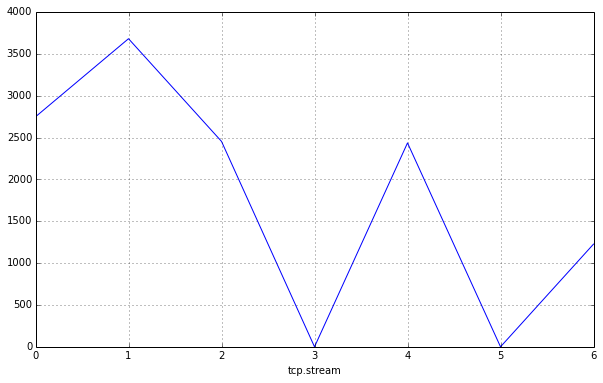

In [38]:
bytes_per_stream.plot()

In [39]:
bytes_per_stream.max()

3681

In [40]:
biggest_stream=bytes_per_stream.idxmax()
biggest_stream

1

In [41]:
bytes_per_stream.ix[biggest_stream]

3681